In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

filename = '/home/dneil/datasets/driving/rec1487858093_frames.hdf5'

In [2]:
dataset = h5py.File(filename, 'r')
print('Dataset contains:')
for key in dataset.keys():
    if np.prod(dataset[key].shape)<1e8:
        data = np.array(dataset[key])
    else:
        data = np.array(dataset[key][:1000])
    print('  {}, Min: {}, Mean: {}, Max: {}, size: {}'.format(
        key, np.min(data), np.mean(data), np.max(data), dataset[key].shape))

Dataset contains:
  accelerator_pedal_position, Min: 0.0, Mean: 4.77178963599, Max: 30.200001, size: (24576,)
  aps_frame, Min: 0, Mean: 112.131180013, Max: 215, size: (24576, 260, 346)
  aps_frame_60x80, Min: 0, Mean: 112.145136667, Max: 198, size: (24576, 60, 80)
  aps_frame_60x80_mean, Min: 3.79025423729, Mean: 105.710437571, Max: 184.943149718, size: (60, 80)
  aps_frame_60x80_std, Min: 13.7181796864, Mean: 42.5917153543, Max: 74.4352959731, size: (60, 80)
  brake_pedal_status, Min: 0.0, Mean: 0.450846354167, Max: 1.0, size: (24576,)
  dvs_frame, Min: 0, Mean: 0.0, Max: 0, size: (24576, 260, 346)
  engine_speed, Min: 0.0, Mean: 944.598551432, Max: 2636.0, size: (24576,)
  fuel_consumed_since_restart, Min: 0.0, Mean: 0.576086704753, Max: 0.966172, size: (24576,)
  fuel_level, Min: 0.0, Mean: 36.3258907472, Max: 36.956638, size: (24576,)
  headlamp_status, Min: 0.0, Mean: 0.02392578125, Max: 1.0, size: (24576,)
  high_beam_status, Min: 0.0, Mean: 0.0, Max: 0.0, size: (24576,)
  ignit

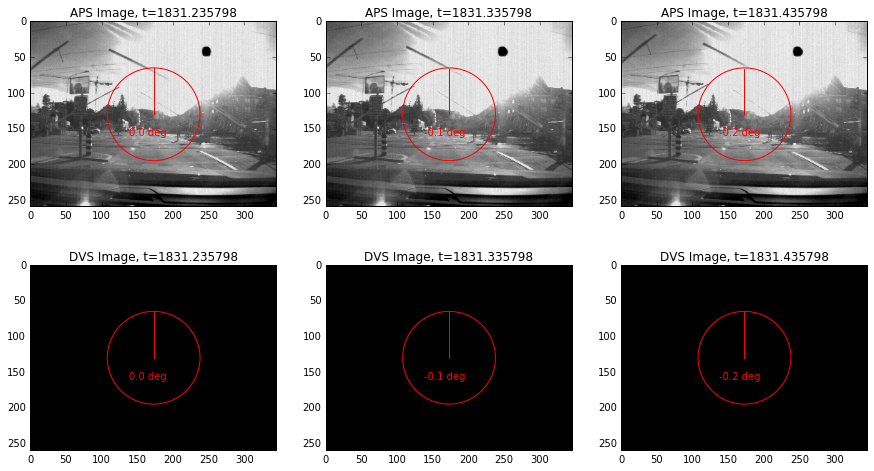

In [3]:
view_idx = 10
num_frames = 3

def plot_steering_angle(angle):
    a_rad = angle / 180. * np.pi + np.pi / 2
    c, r = (173, 130), 65 #center, radius
    t = (c[0] + int(np.cos(a_rad) * r), c[1] - int(np.sin(a_rad) * r))
    plt.plot((c[0], t[0]), (c[1], t[1]), 'r')
    plt.gca().add_artist(plt.Circle(c, r, edgecolor='r', facecolor='none'))
    plt.text(c[0]-35, c[1]+30, '{:0.1f} deg'.format(angle), color='r')
    
plt.figure(figsize=(5*num_frames,8))
for idx in range(num_frames):
    plt.subplot(2, num_frames, idx+1)
    plt.title('APS Image, t={}'.format(dataset['timestamp'][view_idx+idx]))
    plt.imshow(dataset['aps_frame'][view_idx+idx], cmap='gray')
    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx])
    plt.xlim([0, dataset['aps_frame'][view_idx+idx].shape[1]-1])
    plt.ylim([dataset['aps_frame'][view_idx+idx].shape[0]-1, 0])    

    plt.subplot(2, num_frames, num_frames+idx+1)
    plt.title('DVS Image, t={}'.format(dataset['timestamp'][view_idx+idx]))    
    plt.imshow(dataset['dvs_frame'][view_idx+idx], cmap='gray')
    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx])
    plt.xlim([0, dataset['dvs_frame'][view_idx+idx].shape[1]-1])
    plt.ylim([dataset['dvs_frame'][view_idx+idx].shape[0]-1, 0])    

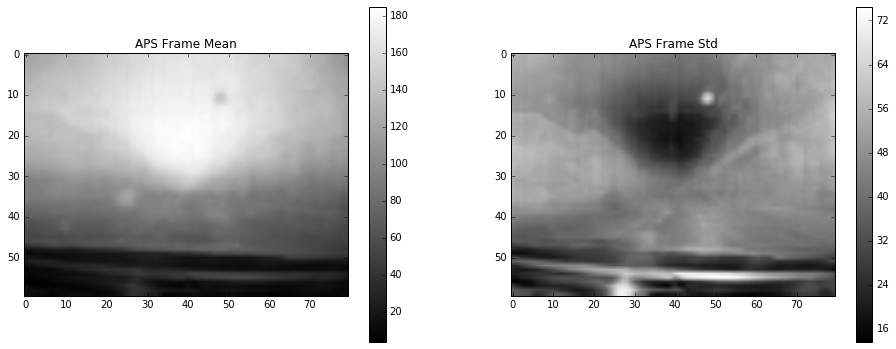

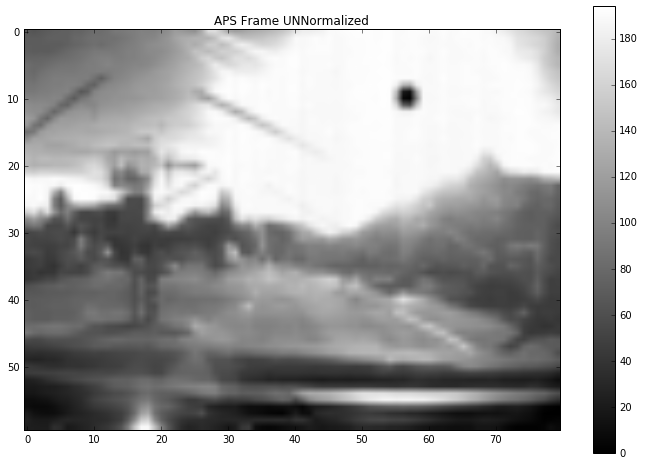

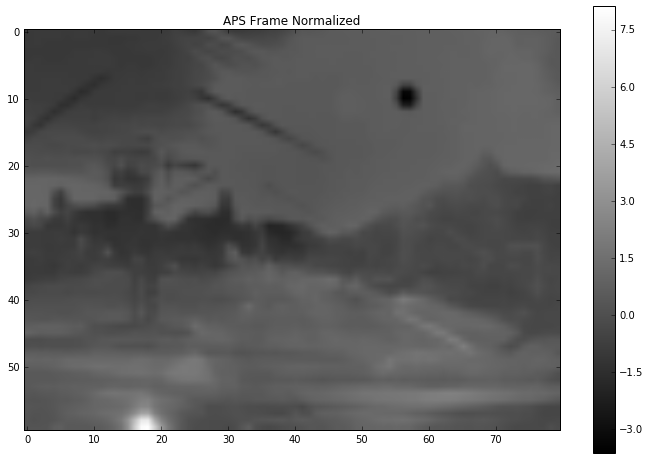

In [7]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APS Frame Mean')
plt.imshow(dataset['aps_frame_60x80_mean'], cmap='gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('APS Frame Std')
plt.imshow(dataset['aps_frame_60x80_std'], cmap='gray')
plt.colorbar()

plt.figure(figsize=(12,8))
plt.title('APS Frame UNNormalized')
plt.imshow(dataset['aps_frame_60x80'][view_idx], cmap='gray')
plt.colorbar()

plt.figure(figsize=(12,8))
plt.title('APS Frame Normalized')
plt.imshow((dataset['aps_frame_60x80'][view_idx]-dataset['aps_frame_60x80_mean'])/dataset['aps_frame_60x80_std'], cmap='gray')
plt.colorbar()


In [ ]:

filename = '/home/dneil/datasets/driving/rec1487864316_bin5k.hdf5'
dataset = h5py.File(filename, 'r')
train_idxs = dataset['train_idxs']                    
test_idxs = dataset['test_idxs']                    
times = dataset['timestamp']
orig_times = dataset['orig_timestamp']
plt.figure(figsize=(12,5))
plt.plot(train_idxs, orig_times[train_idxs], 'g.')
plt.plot(test_idxs, orig_times[test_idxs], 'g.')
plt.plot(train_idxs, times[train_idxs], 'r.')
plt.plot(test_idxs, times[test_idxs], 'b.')
# plt.title('Shared keys: {}'.format(set().intersection(dataset['train_idxs'], dataset['test_idxs'])))
plt.grid(which='both')
plt.ylabel('Time [s]')
plt.xlabel('Event #')
plt.savefig('timestamp_reset.png')

In [ ]:
filename = '/home/dneil/datasets/driving/rec1487864316_bin10ms.hdf5'
f = h5py.File(filename, 'r')
times = np.array(f['timestamp'])
times[times==0] = np.nan
plt.plot(times)
print(np.nanmin(times), np.nanmax(times), np.nanmax(times)-np.nanmin(times))
# filename = '/home/dneil/datasets/driving/rec1487864316_bin5k.hdf5'
# f = h5py.File(filename, 'r')
# times = np.array(f['timestamp'])
# times[times==0] = np.nan
# plt.plot(times)
# print(np.nanmin(times), np.nanmax(times), np.nanmax(times)-np.nanmin(times))

In [ ]:
filename = '/home/dneil/datasets/driving/rec1487864316.hdf5'
f = h5py.File(filename, 'r')
print('Dataset contains:')
for key in f.keys():
    if hasattr(f[key]['data'], 'shape') and np.prod(f[key]['data'].shape)<1e6:
        data = np.array(f[key]['data'])
        length = data.shape
    else:
        data = np.array(f[key]['data'][:1000])
        length = data.shape
    print('  {}, size: {}'.format(
        key, data.shape))

print(len(f['accelerator_pedal_position/timestamp']))

In [ ]:
all_idxs = np.sort(np.array(dataset['train_idxs']))
print(len(all_idxs))
jumps = np.where(np.diff(all_idxs)>1)[0]
print(diffs)
print(all_idxs[42368],all_idxs[42369])
print([0,]+list(jumps+1))
print(list(jumps+1)+[len(all_idxs)])
print all_idxs[42367], all_idxs[42368], all_idxs[42369]
print all_idxs[88649], all_idxs[88650], all_idxs[88651], all_idxs[126329]